In [1]:
import sys
from itables import init_notebook_mode
from sklearn.preprocessing import MinMaxScaler

sys.path.append("./../src/")
#init_notebook_mode(all_interactive=True)

import data_loader as dl
import preprocessing as pp
import model as m
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
uk = True
shifts = [1,6,144]
non_nan_percentage = 90
col_to_be_lagged = ["Wind speed (m/s)",'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)']
val_ratio=0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]

## Run models

In [4]:
models = run.pipeline(kwf2, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 10min horizon


/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 1 hour horizon


/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Finished training model 1 day horizon


## Plot results

In [5]:
visualizations.plot_metrics(models)

| Model Name     |    RMSE |      MAE |
|:---------------|--------:|---------:|
| 10min horizon  | 142.247 |  89.4197 |
| 1 hour horizon | 247.722 | 170.343  |
| 1 day horizon  | 624.862 | 500.395  |


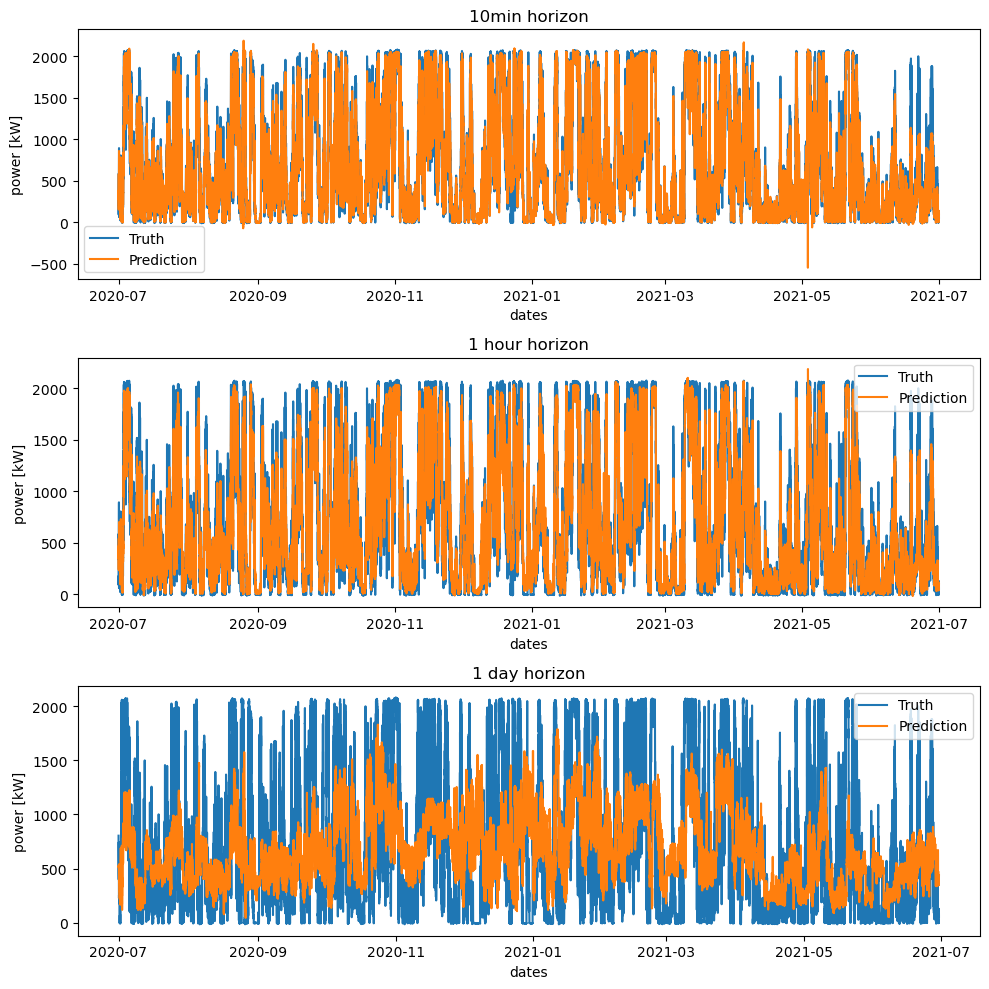

In [6]:
visualizations.plot_models(models)
